<img src="img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Anscombe's Quartet

(c) Hywel Owen  
University of Manchester  
27th February 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](img/bee.png)
## Anscombe's Quartet

In this notebook we numerically demonstrate Anscombe's Quartet, which illustrates the importance of graphing data as well as carrying out numerical measures of the statistical properties of that data. We use the data given in the Wikipedia article here:  
http://en.wikipedia.org/wiki/Anscombe's_quartet

First we define the four data sets: (x1,y1), (x2,y2), (x3,y3), (x4,y4):

In [3]:
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

x3 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

We calculate the mean of the four x arrays, and see that they are all the same:

In [4]:
print(np.mean(x1))
print(np.mean(x2))
print(np.mean(x3))
print(np.mean(x4))

9.0
9.0
9.0
9.0


The variances of x also look the same as each other:

In [5]:
print(np.var(x1))
print(np.var(x2))
print(np.var(x3))
print(np.var(x4))

10.0
10.0
10.0
10.0


Similarly, the means and variances of the y arrays are also the same as each other:

In [6]:
print(np.mean(y1))
print(np.mean(y2))
print(np.mean(y3))
print(np.mean(y4))

7.500909090909093
7.50090909090909
7.5
7.500909090909091


In [7]:
print(np.var(y1))
print(np.var(y2))
print(np.var(y3))
print(np.var(y4))

3.7520628099173554
3.752390082644628
3.747836363636364
3.7484082644628103


The 4 data sets also have the same correlation coefficient between their data points:

In [8]:
print(np.corrcoef(x1,y1)[0][1])
print(np.corrcoef(x2,y2)[0][1])
print(np.corrcoef(x3,y3)[0][1])
print(np.corrcoef(x4,y4)[0][1])

0.81642051634484
0.8162365060002428
0.8162867394895984
0.8165214368885028


Finally, when we do a linear fit to each of the data sets, we see that the best-fit lines are also the same as each other:

In [10]:
m1, c1 = np.polyfit(x1,y1,1)
print('y = {:04.2f} x + {:04.2f}'.format(m1,c1))
m2, c2 = np.polyfit(x2,y2,1)
print('y = {:04.2f} x + {:04.2f}'.format(m2,c2))
m3, c3 = np.polyfit(x3,y3,1)
print('y = {:04.2f} x + {:04.2f}'.format(m3,c3))
m4, c4 = np.polyfit(x4,y4,1)
print('y = {:04.2f} x + {:04.2f}'.format(m4,c4))

y = 0.50 x + 3.00
y = 0.50 x + 3.00
y = 0.50 x + 3.00
y = 0.50 x + 3.00


So, we see from the above discussion that the data sets look the same as each other **numerically**. However, the point of these data sets is to show that simple numerical measures can be misleading.

To illustrate this, we first generate the fitted lines to our 4 data sets (yes, they're all the same as each other but let's generate them separately anyway):

In [17]:
xfit = np.arange(0,20,0.1) # x values to generate fitted lines for all datasets
yfit1 = m1*xfit + c1
yfit2 = m2*xfit + c2
yfit3 = m3*xfit + c3
yfit4 = m4*xfit + c4

We then plot each fitted line against its original data set:

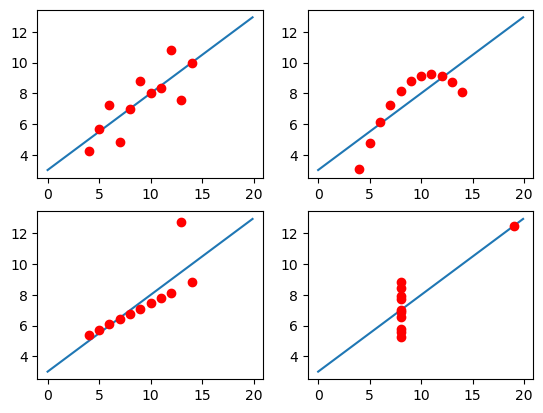

In [22]:
plt.subplot(221)
plt.plot(xfit,yfit1)
plt.plot(x1,y1,'ro')
plt.subplot(222)
plt.plot(xfit,yfit2)
plt.plot(x2,y2,'ro')
plt.subplot(223)
plt.plot(xfit,yfit3)
plt.plot(x3,y3,'ro')
plt.subplot(224)
plt.plot(xfit,yfit4)
plt.plot(x4,y4,'ro')

Obviously, there is a great deal of different between the 4 data sets. Let's discuss and interpret each in turn:  
  
Data set (x1,y1) is sort-of 'normal'; the data exhibits the typical behaviour one might expect from random (experimental) fluctuations in the individual values.  
  
Data set (x2,y2) has a very obvious systematic behaviour and is obviously not randomly-fluctuating. But - as we have seen - you would not see this just by calculating the numerical values of the fits, correlation etc.  
  
Data set (x3,y3) is different. Quite obviously there is a bad data point, that makes data with quite different behaviour (different gradient and different correlation) look like data set (x1,y1).  
  
Data set (x4,y4) is even worse! We clearly see by inspection that there is a single bad data point that changes the apparent behaviour of this data. Without the bad data point, we see that there is **no** relationship between the x and y values. y varies without any variation of x at all. Perhaps the instrument making the x values was broken!

So, the conclusion here is obvious. You should plot your data to see what it looks like!